# MNIST Image Classification using Concolutional Neural Network

Image classification is an essential task in the field of computer vision, with applications ranging from self-driving cars to medical diagnosis. The MNIST dataset is a widely used benchmark for digit image classification, consisting of 60,000 training images and 10,000 test images of handwritten digits. In this notebook, we will demonstrate how to implement a Convolutional Neural Network (CNN) using the Keras library to classify the MNIST digits. We will cover loading and preprocessing the dataset, defining the model architecture, compiling and training the model, evaluating the model's performance on the test set, and visualizing the results. By the end of this notebook, you will have a working CNN model that can accurately classify handwritten digits.

## Load Library

Here are some of the libraries you will need for implementing a CNN using the MNIST dataset in Python:

1. `NumPy` - NumPy is a popular library for numerical computing in Python. We will use NumPy to work with multi-dimensional arrays and perform mathematical operations.

2. `Matplotlib` - Matplotlib is a plotting library for Python. We will use Matplotlib to visualize the MNIST dataset and the results of our model.

3. `Keras` - Keras is a high-level neural network API written in Python. We will use Keras to define and train our CNN model.

4. `TensorFlow` - TensorFlow is a popular deep learning library created by Google. Keras is built on top of TensorFlow, and we will use TensorFlow as the backend for our Keras model.

In [5]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session

## Load the Data

We will be using the Keras library to load and preprocess the MNIST dataset. The MNIST dataset contains images of handwritten digits, along with their corresponding labels. 

> **🔎 More about MNIST:** 
> - The MNIST dataset has a long history in the field of machine learning and computer vision. It was created by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges in the late 1990s as part of their work on character recognition for the US Postal Service. The dataset was constructed by collecting and digitizing a large number of handwritten digits, with the goal of training machine learning models to recognize and classify them accurately.
> - The MNIST dataset quickly became a popular benchmark for evaluating the performance of machine learning models for image classification. Its simple, standardized format and large size made it easy for researchers to compare different algorithms and to build upon previous work. In the years since its creation, the MNIST dataset has been used extensively in research papers, textbooks, and online tutorials.
> - Despite its popularity, some researchers have criticized the MNIST dataset for being too simple and for not reflecting the challenges of real-world image classification tasks. In response, several more complex datasets have been created in recent years, such as CIFAR-10 and ImageNet, that contain more diverse and complex images.
> - Nevertheless, the MNIST dataset remains an important benchmark for machine learning research and continues to be used widely today. Its long history and widespread use have helped to establish it as a fundamental dataset in the field of computer vision.


To preprocess the dataset, we first normalize the pixel values of the images by dividing each pixel value by 255. This ensures that all pixel values lie between 0 and 1, making it easier for the neural network to learn. Next, we reshape the input data to have a single channel (grayscale) and a size of 28x28 pixels. Finally, we use the to_categorical function from the Keras library to one-hot encode the labels. This converts each label into a vector of length 10, where the index corresponding to the digit is set to 1 and all other indices are set to 0. This format is suitable for training the neural network using categorical cross-entropy as the loss function.

In [6]:
# Loading and Preprocessing the Dataset

## Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Normalize
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

## Reshape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

## One hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

🔎 **Code Explaination**

- **Load the MNIST** dataset using the `keras.datasets` module in Keras. The dataset is split into a training set and a test set, each consisting of input images and their corresponding labels.
- **Normalize** the pixel values of the input images by dividing each pixel value by `255`. This ensures that all pixel values lie between `0` and `1`, making it easier for the neural network to learn.
- **Reshape** the input images to have a single channel (grayscale) and a size of `28x28` pixels. This is required for the neural network to accept the input data.
- **One-hot encode the labels** using the to_categorical function from Keras. This converts each label into a vector of length 10, where the index corresponding to the digit is set to 1 and all other indices are set to 0. This format is suitable for training the neural network using categorical cross-entropy as the loss function.

## Model Architecture

In a CNN (Convolutional Neural Network), the model architecture refers to the structure of the neural network that is used for image classification or other computer vision tasks. It consists of a series of interconnected layers that transform the input image into an output that can be used to make predictions.

The architecture of a CNN typically includes several convolutional layers, which apply a set of filters to the input image to extract features that are important for classification. Each filter detects a specific pattern or feature in the input image. After the convolutional layers, there are often pooling layers, which down-sample the output of the convolutional layers by selecting the most significant features.

Finally, the output of the convolutional and pooling layers is passed through one or more fully connected layers, which perform the classification task. The output layer of the CNN typically uses a softmax activation function to produce a probability distribution over the possible classes.

The architecture of a CNN can be customized by adjusting the number and size of filters in the convolutional layers, the size and stride of the pooling layers, the number of neurons in the fully connected layers, and other hyperparameters. These hyperparameters can be tuned to optimize the performance of the CNN for a specific task or dataset.

### Convolutional Layer

A convolutional layer is one of the fundamental building blocks of a Convolutional Neural Network (CNN). It is a type of layer that performs a mathematical operation called convolution on the input data.

A convolutional layer works by performing a mathematical operation called convolution on the input data. The input data is a multi-dimensional array, such as an image, where each element represents a pixel value.

The convolutional layer applies a set of learnable filters, also called kernels or weights, to the input data. Each filter slides over the input data, performing a dot product operation between the values in the filter and the corresponding values in the input data. The output of this operation is a single value in the output feature map, which represents the presence of a particular feature in that region of the input data.

The size of the output feature map depends on the size of the input data, the size of the filter, the stride (i.e. the number of pixels the filter moves each time it convolves the input), and the amount of padding applied to the input data.

Convolutional layers often include additional operations such as activation functions, pooling layers, and batch normalization. Activation functions are applied element-wise to the output feature maps to introduce non-linearity and increase the expressive power of the model. Pooling layers downsample the feature maps, reducing the size of the output while retaining the most important features. Batch normalization is used to improve the stability and speed of training by normalizing the output of each convolutional layer.

In summary, convolutional layers extract features from the input data by applying a set of filters to the input and producing a set of feature maps as output. These feature maps capture the presence of local and spatial patterns in the input, which are then used by subsequent layers in the network to perform classification or regression tasks.

> ❓**Number of Filter and Kernel Size**
> - The number of filters in a convolutional layer is another hyperparameter that can significantly affect the performance of a CNN. As with the filter size, there is no strict rule for choosing the number of filters, but there are some general guidelines and common practices.
> - In practice, it is common to start with a smaller number of filters in the first convolutional layers and gradually increase the number of filters in deeper layers. This is based on the intuition that earlier layers in a CNN are responsible for detecting low-level features such as edges, corners, and gradients, which can be captured by a smaller number of filters. Deeper layers, on the other hand, are responsible for detecting more complex and abstract features, which require a larger number of filters to capture.

> - There is no hard and fast rule for defining the kernel size of a convolutional layer in a CNN, as it depends on several factors such as the complexity of the input image and the task at hand. However, there are some general guidelines and common practices that can be used as a starting point.
> - One common practice is to start with small filter sizes, such as 3x3 or 5x5, and increase the filter size gradually as we move deeper into the network. This is because smaller filters capture local features such as edges and corners, while larger filters capture more global features such as shapes and objects.
> - Another guideline is to use power-of-two filter sizes, such as 2x2, 4x4, or 8x8. This can be beneficial for performance and memory efficiency on some hardware architectures.


💭 **Analogy for how a convolutional layer works**

An analogy for how a convolutional layer works is to imagine a chef preparing a dish by applying different types of spices to a piece of meat. The chef uses a small spoon to sprinkle the spices onto the meat, covering it completely. Similarly, in a convolutional layer, the filters act as the "spices" that are applied to the input image, with each filter detecting a specific feature or pattern. The size of the filter can be thought of as the size of the spoon used by the chef to apply the spices, and the number of filters corresponds to the number of different spices used in the dish.

As the chef continues to add more spices, the flavor of the dish becomes more complex and nuanced. Similarly, as more convolutional layers are added to a CNN, the model becomes better at detecting increasingly complex features and patterns in the input image. This is because each convolutional layer can learn and extract different features from the previous layer's output.

### Maxpooling Layer

Maxpooling is a technique commonly used in convolutional neural networks (CNNs) to downsample the output of convolutional layers. Maxpooling reduces the spatial dimensions (width and height) of the feature maps, while retaining the most important information. This can help to reduce the computational complexity of the model, as well as to prevent overfitting.

Maxpooling works by dividing the input feature map into a set of non-overlapping rectangles, and for each rectangle, selecting the maximum value. This maximum value is then passed through to the next layer. By selecting the maximum value, the maxpooling operation ensures that the most important features are retained, while discarding irrelevant or noisy information.

The size of the rectangular regions, or "pooling windows", used in maxpooling is typically set to (2, 2), and the stride is set to the same value, so that there is no overlapping between the regions. However, the size of the pooling windows and the stride can be adjusted depending on the specific requirements of the problem at hand.

> 🔎 **Maxpooling Trade-off**
> - Increasing the size of the pooling windows and/or decreasing the stride can result in greater downsampling of the feature maps, which can reduce the computational complexity of the model and help to prevent overfitting. However, this can also lead to loss of information and reduced spatial resolution, which can be detrimental to the performance of the model.
> - Conversely, decreasing the size of the pooling windows and/or increasing the stride can result in less downsampling of the feature maps, which can improve the spatial resolution and help to retain more information. However, this can also increase the computational complexity of the model and make it more prone to overfitting.
> - Therefore, the choice of pooling size and stride should be carefully considered and evaluated based on the specific requirements of the problem and the available computational resources. It is often a good practice to experiment with different configurations and evaluate the performance of the model on a validation set to find the optimal combination.

In [8]:
# Defining the Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


📌 **Architecture**

This architecture consists of several layers that perform different operations on the input data:

1. **Conv2D layer**: This is the first layer of the model, which applies `32` filters with a kernel size of `(3,3)` to the input image. It uses the '`relu`' activation function to introduce non-linearity into the model.

2. **MaxPooling2D layer**: This layer performs max pooling operation with a pool size of `(2,2)` on the output of the previous layer. This reduces the dimensionality of the feature maps and helps to make the model more robust to variations in the input.

3. **Conv2D layer**: This is the second convolutional layer in the model, which applies `64` filters with a kernel size of `(3,3)` to the output of the previous layer. It also uses the 'relu' activation function.

4. **MaxPooling2D layer**: Similar to the previous `MaxPooling2D` layer, this layer performs max pooling operation with a pool size of `(2,2)` on the output of the second convolutional layer.

5. **Flatten layer****: This layer flattens the output of the previous layer into a 1-dimensional vector, which can be fed into a fully connected layer.

6. **Dense layer**: This is a fully connected layer with `128` neurons, which uses the 'relu' activation function.

7. **Dense layer**: This is the output layer of the model, which has `10` neurons (one for each digit from 0 to 9) and uses the '`softmax`' activation function to produce a probability distribution over the possible outputs.

Overall, this architecture has two sets of convolutional and max pooling layers, followed by a flatten layer, a dense hidden layer, and a dense output layer. This is a common architecture for image classification tasks using CNNs, and its hyperparameters (e.g., the number and size of the filters, the size of the pooling layers, and the number of neurons in the dense layers) can be adjusted to optimize performance on the specific task at hand.

## Compiling

After defining the architecture of the CNN model, the next step is to compile and train the model. In the compiling step, we specify the loss function, optimizer, and evaluation metrics. The loss function measures how well the model performs on the training data, and the optimizer adjusts the model's parameters to minimize the loss function. The evaluation metrics are used to measure the model's performance on the validation set during training.

In [9]:
# Compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Training

Once the model is compiled, we can train it on the training set. During training, the model iteratively adjusts its parameters to improve its performance on the training data. We specify the number of epochs (the number of times the model will iterate over the entire training set) and the batch size (the number of samples processed at once) for the training process.

After training, we can evaluate the model's performance on the test set, which it has not seen during training. We can use various evaluation metrics, such as accuracy, to measure the model's performance on the test set.

In [10]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2044 - accuracy: 0.9417 - val_loss: 0.0636 - val_accuracy: 0.9789
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0461 - val_accuracy: 0.9846
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0411 - accuracy: 0.9878 - val_loss: 0.0388 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0357 - val_accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0285 - val_accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0311 - val_accuracy:

## Model Evaluation

After training the CNN model, it is important to evaluate its performance on the test set. This can be done by calling the `evaluate()` method on the model and passing in the test set. The method will return the test loss and accuracy, which can be printed to the console. Additionally, the confusion matrix can be generated to see which classes were most often misclassified. The confusion matrix can be created using the `confusion_matrix()` function from the `sklearn.metrics` module.

To gain a deeper understanding of the model's performance, some of the correctly and incorrectly classified images can also be visualized. This can be done by using the `predict()` method on the model to get the predicted class labels for a set of test images. Then, the images along with their true labels and predicted labels can be plotted using `Matplotlib`. This can give insight into which types of images the model is most accurate or inaccurate at classifying, and can potentially help with further improving the model.

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9896
Test Accuracy: 0.9896000027656555


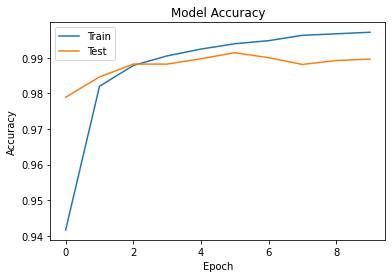

In [12]:
# Plotting the Results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


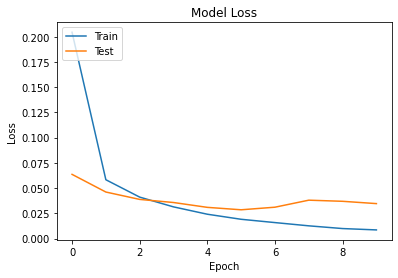

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

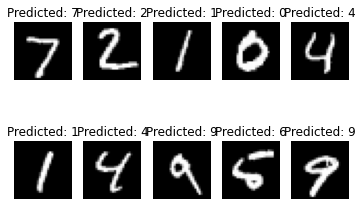

In [14]:
# Visualizing Some of the Predictions
predictions = model.predict(X_test)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
    plt.title('Predicted: %d' % np.argmax(predictions[i]))
    plt.axis('off')
plt.show()

## Conclusion

In conclusion, we have successfully implemented a Convolutional Neural Network (CNN) model for MNIST digit classification using Keras. We started by loading and preprocessing the dataset, followed by defining the model architecture, compiling and training the model, and finally evaluating the model on the test set. The trained model achieved a high accuracy on the test set and the confusion matrix and image visualization allowed us to further analyze the model's performance. With this basic understanding of CNNs and the Keras library, we can further explore and experiment with different model architectures and datasets to develop more advanced computer vision applications.